# Credit Card Customer Data Analysis using Machine Learning  

## Index <br>
<br>
 1. Exploratory Data Analysis<br>
 &nbsp; &nbsp;    1.1 Cleaning the data<br>
 &nbsp; &nbsp;    1.2 Visualising the data<br>
<br>
 2. Feature Engineering<br>
 &nbsp; &nbsp;    2.1 Correlation matrix with heatmap<br>
 &nbsp; &nbsp;    2.2 One Hot Encoding<br>
 &nbsp; &nbsp;    2.3 Recursive Feature Elimination<br>
 &nbsp; &nbsp;    2.4 Feature Selection<br>
<br>
 3. Machine learning modelling<br>
 &nbsp; &nbsp;    3.1 Splitting the Dataset into training and testing data <br>
 &nbsp; &nbsp;    3.2 K Nearest Neighbour<br>
 &nbsp; &nbsp;    3.3 Random Forest<br>
 &nbsp; &nbsp;    3.4 DecisionTree Classifier<br>
<br>
 4. Insights<br>

## Importing Packages

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Loading of dataset

In [15]:
df=pd.read_csv("D:\mini project\credit_card_customer_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 1. Exploratory Data Analysis

### 1.1 Cleaning the data

In [16]:
df.shape

(30000, 25)

In [17]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [18]:
df.columns[5]

'AGE'

In [19]:
df.info(verbose=True, null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

C:\Users\heman\AppData\Local\Temp/ipykernel_11428/870001072.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


verbose: bool, optional<br>
Whether to print the full summary

### 1.1.1 Handling Null values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [21]:
df["PAY_1"].value_counts()

0                13402
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [22]:
df['PAY_1'] = df.apply(lambda row: row['PAY_2']+1 if row['PAY_1'] == 'Not available' else row['PAY_1'],axis=1)

In [23]:
df['PAY_1'] = df['PAY_1'].astype(int)

In [24]:
df['PAY_1'].value_counts()

 0    14023
-1     5418
 1     4863
-2     2476
 2     2382
 3      661
 4       99
 5       37
 8       20
 6       11
 7       10
Name: PAY_1, dtype: int64

In [25]:
df['PAY_2'].value_counts()

 0    15878
-1     5989
 2     3878
-2     3746
 3      325
 4       99
 1       28
 5       24
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [26]:
df['PAY_3'].value_counts()

 0    15914
-1     5869
-2     4046
 2     3782
 3      237
 4       74
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [27]:
df['PAY_4'].value_counts()

 0    16600
-1     5624
-2     4309
 2     3121
 3      180
 4       66
 7       57
 5       34
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

In [28]:
df['PAY_5'].value_counts()

 0    17069
-1     5488
-2     4503
 2     2603
 3      177
 4       81
 7       57
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [29]:
df['PAY_6'].value_counts()

 0    16408
-1     5686
-2     4849
 2     2749
 3      181
 4       48
 7       45
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

In [30]:
df['SEX'].value_counts()

2    17910
1    11775
0      315
Name: SEX, dtype: int64

In [31]:
df['EDUCATION'].value_counts()

2    13884
1    10474
3     4867
0      329
5      275
4      122
6       49
Name: EDUCATION, dtype: int64

In [32]:
df["EDUCATION"].replace(to_replace = [0,5,6] , value = 4 , inplace = True)
df["EDUCATION"].value_counts()

2    13884
1    10474
3     4867
4      775
Name: EDUCATION, dtype: int64

In [33]:
df['MARRIAGE'].value_counts()

2    15810
1    13503
0      369
3      318
Name: MARRIAGE, dtype: int64

In [34]:
df["MARRIAGE"].replace(to_replace = [0] , value = 3 , inplace = True)
df["MARRIAGE"].value_counts()

2    15810
1    13503
3      687
Name: MARRIAGE, dtype: int64

In [35]:
df['default payment next month'].value_counts()

0    23438
1     6562
Name: default payment next month, dtype: int64

#### Converting AGE TO AgeGroup

In [36]:
df['AGE'].describe()

count    30000.000000
mean        35.108800
std          9.851592
min          0.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [37]:
a = [-10,20,35,55,150]
labels = ['0-20','21-35','36-55','>55']
df['AgeGroup']= pd.cut(df['AGE'],a,labels=labels) #Pandas cut() function is used to separate the array elements into different bins

In [38]:
df['AgeGroup'].value_counts()

21-35    16641
36-55    12211
>55        833
0-20       315
Name: AgeGroup, dtype: int64

### 1.2 Visualising the data

#### PAY_1

<AxesSubplot:>

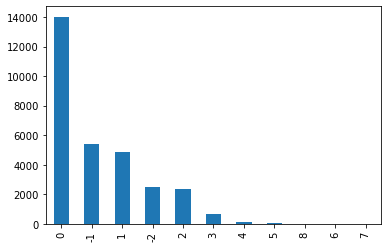

In [39]:
df['PAY_1'].value_counts().plot.bar()

#### AGE

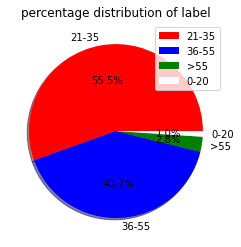

In [40]:
labels= df['AgeGroup'].unique().tolist()
colors= ['r','b','g','w']
values=df['AgeGroup'].value_counts()

plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.legend()
plt.title('percentage distribution of label')

plt.show()

#### PAY_2

<AxesSubplot:>

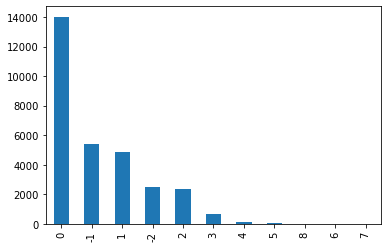

In [41]:
df['PAY_1'].value_counts().plot.bar()

#### EDUCATION

In [42]:
cat_mapping = {1: "graduate school",
               2: "University",
               3: "High school",
               4: "others"}

In [43]:
df2=df
df2["EDUCATION_CAT"] = df2["EDUCATION"].map(cat_mapping)

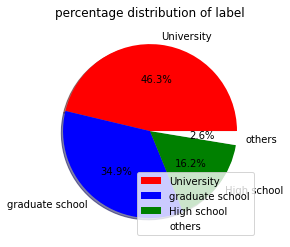

In [44]:
labels= df2['EDUCATION_CAT'].unique().tolist()
colors= ['r','b','g','w']
values=df2['EDUCATION_CAT'].value_counts()

plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.legend(loc=4)
plt.title('percentage distribution of label')

plt.show()

In [45]:
df.drop(["EDUCATION_CAT"],axis=1,inplace=True)

## 2. Feature Engineering

### 2.1 Correlation

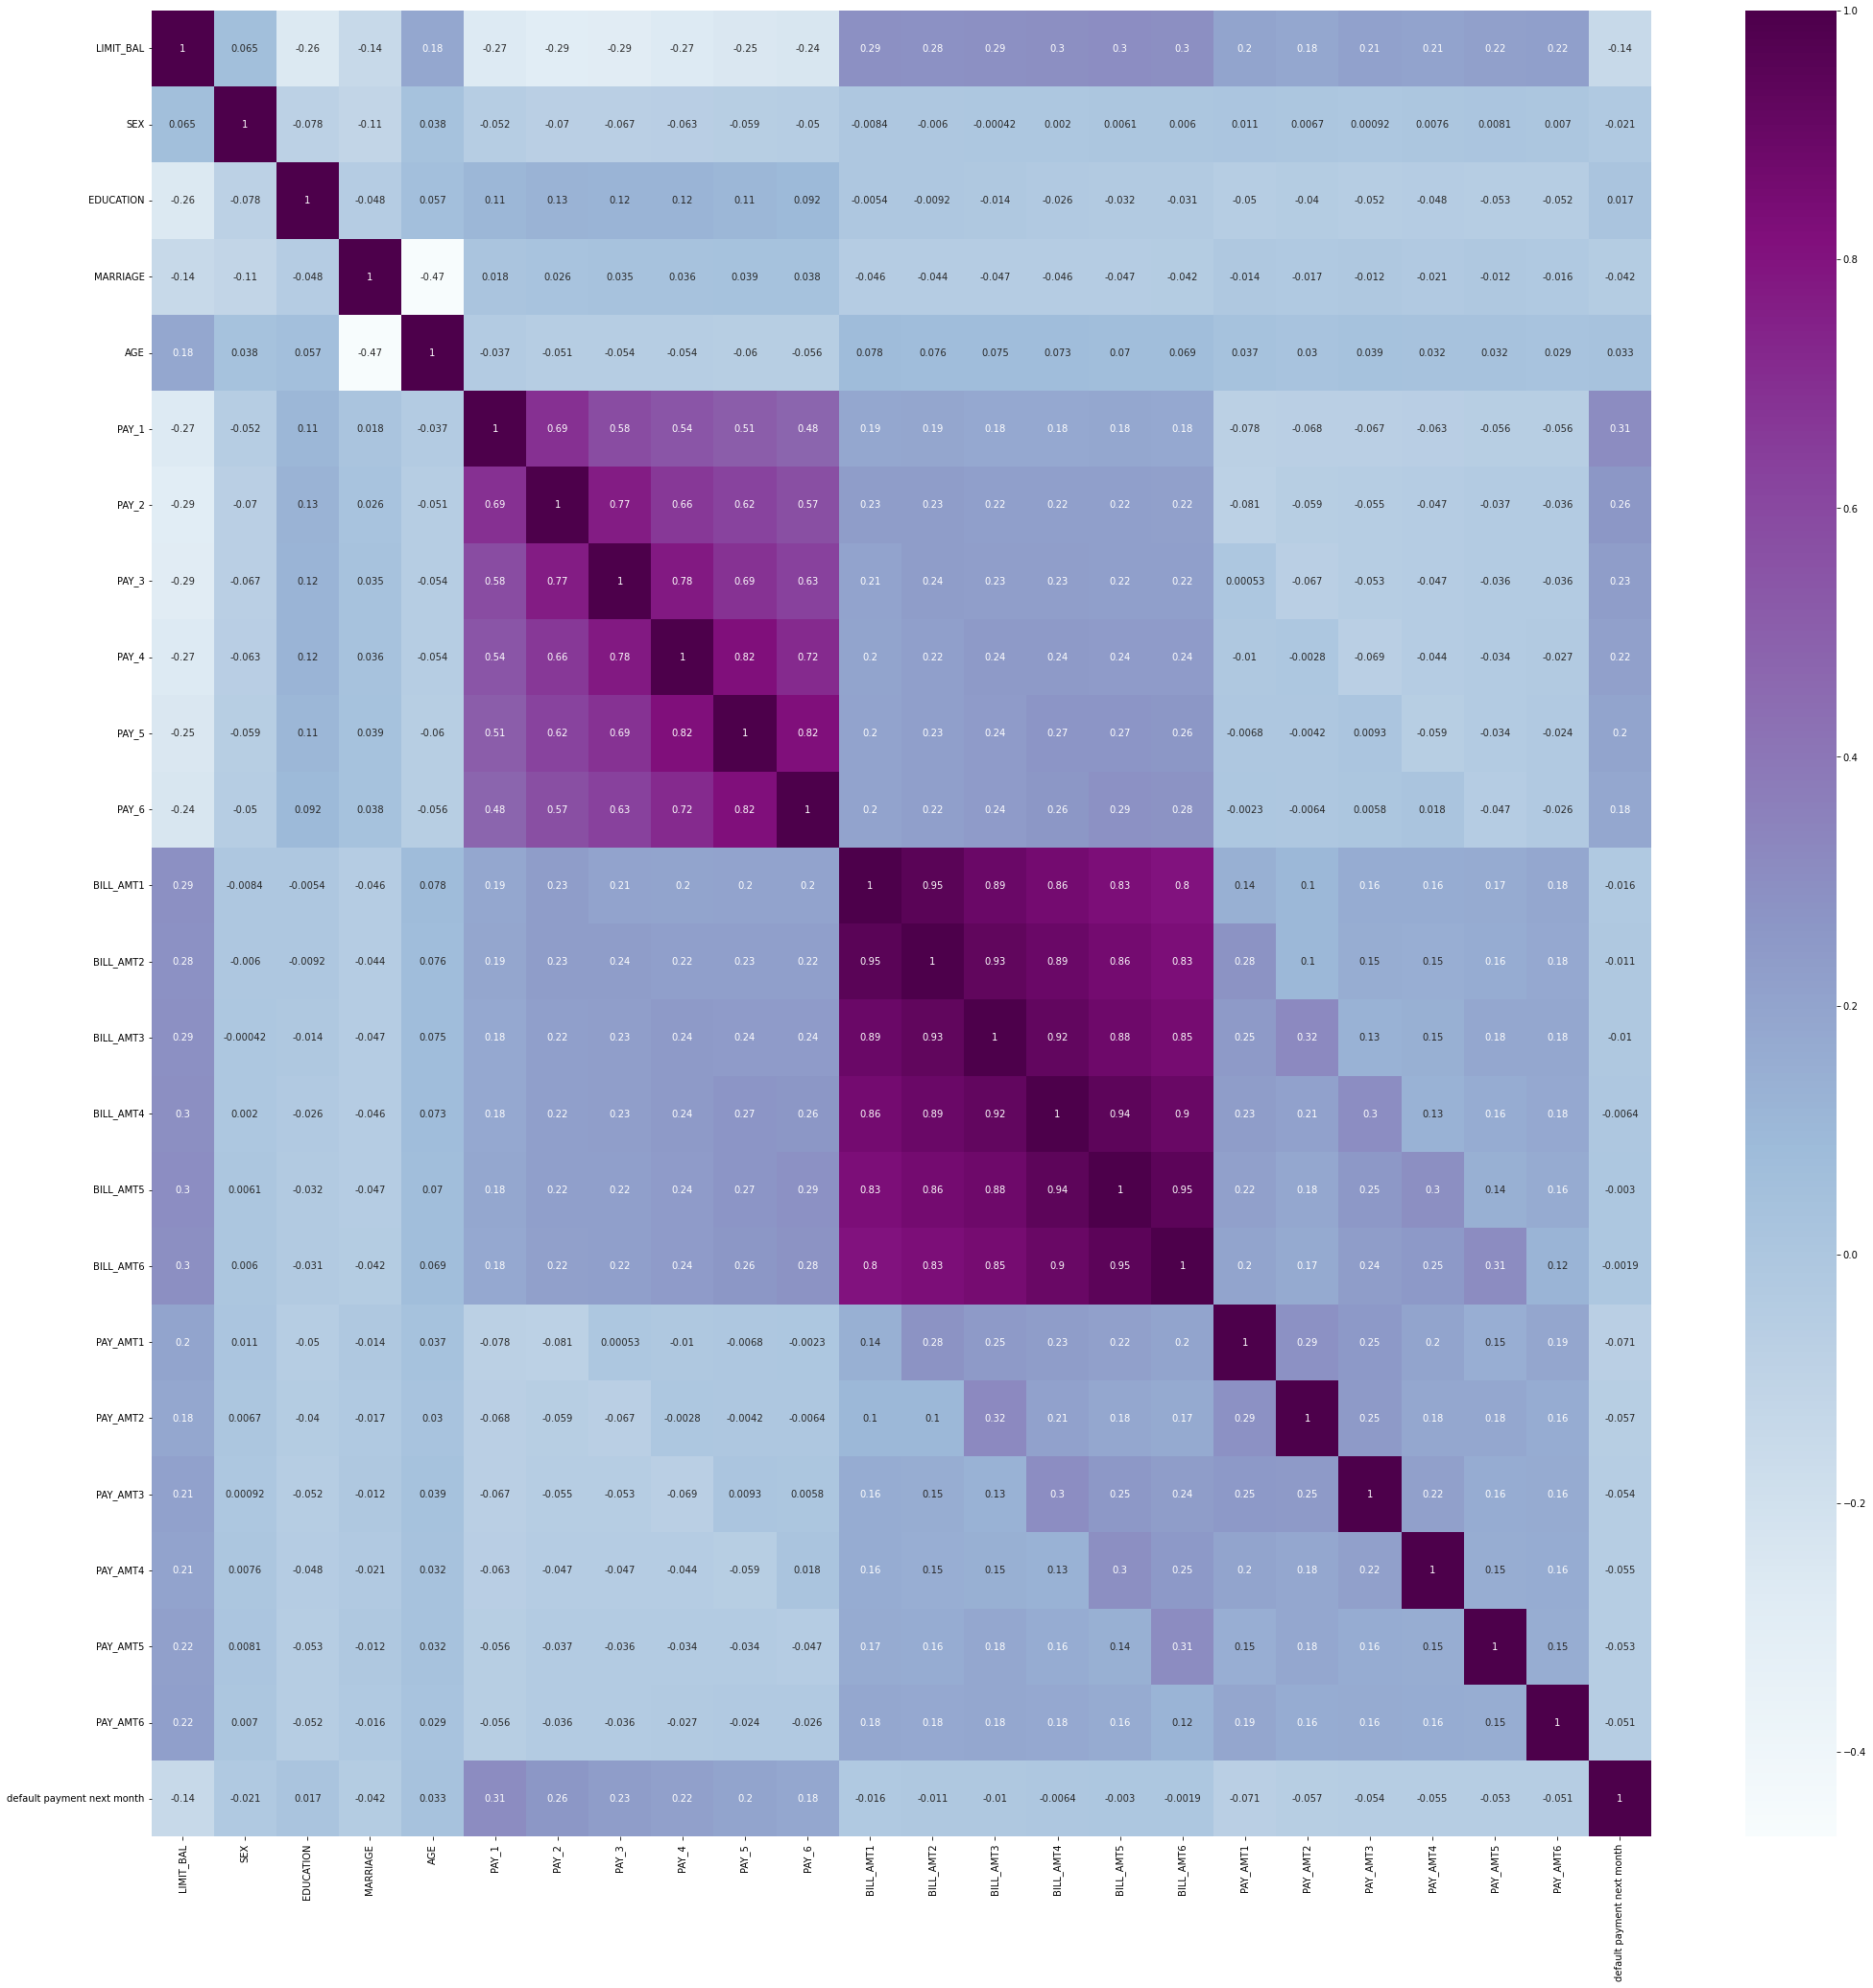

In [46]:
plt.figure(figsize = (35, 35))
cor=df.corr()
sns.heatmap(cor, annot = True, cmap="BuPu")
plt.show()

In [47]:
df.dtypes


ID                              object
LIMIT_BAL                        int64
SEX                              int64
EDUCATION                        int64
MARRIAGE                         int64
AGE                              int64
PAY_1                            int32
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month       int64
AgeGroup                 

### 2.2 One Hot Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
lb=LabelEncoder()
df['SEX']=lb.fit_transform(df['SEX'])
df['SEX'].value_counts()

2    17910
1    11775
0      315
Name: SEX, dtype: int64

In [50]:
df['EDUCATION']=lb.fit_transform(df['EDUCATION'])
df['EDUCATION'].value_counts()

1    13884
0    10474
2     4867
3      775
Name: EDUCATION, dtype: int64

In [51]:
df['MARRIAGE']=lb.fit_transform(df['MARRIAGE'])
df['MARRIAGE'].value_counts()

1    15810
0    13503
2      687
Name: MARRIAGE, dtype: int64

In [52]:
df['AgeGroup']=lb.fit_transform(df['AgeGroup'])
df['AgeGroup'].value_counts()

1    16641
2    12211
3      833
0      315
Name: AgeGroup, dtype: int64

### 2.3 Recursive Feature Elimination

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data

X = df.drop(["default payment next month","ID"],axis=1)
Y = df['default payment next month']
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\heman\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\heman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\heman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

Num Features: 3
Selected Features: [False False False False False  True  True  True False False False False
 False False False False False False False False False False False False]
Feature Ranking: [13  5  2 22  6  1  1  1  3  4 20 11 15 14 19 12 17  7  8 10  9 16 18 21]


In [54]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AgeGroup'],
      dtype='object')

### 2.4 Feature Selection

In [55]:
df1=pd.DataFrame({'X.columns' : X.columns,'Feature Ranking' : fit.ranking_}).sort_values('Feature Ranking')
df1

,X.columns,Feature Ranking
5,PAY_1,1
6,PAY_2,1
7,PAY_3,1
2,EDUCATION,2
8,PAY_4,3
9,PAY_5,4
1,SEX,5
4,AGE,6
17,PAY_AMT1,7
18,PAY_AMT2,8


In [56]:
final_df = df.drop(["BILL_AMT4","BILL_AMT6","PAY_AMT6","BILL_AMT3","PAY_AMT5","LIMIT_BAL","BILL_AMT5","PAY_AMT3","PAY_AMT4","BILL_AMT2","BILL_AMT1","PAY_AMT2","PAY_AMT1","AGE"],axis=1)

In [57]:
final_df

,ID,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,AgeGroup
0,798fc410-45c1,2,1,0,2,2,-1,-1,-2,-2,1,1
1,8a8c8f3b-8eb4,2,1,1,-1,2,0,0,0,2,1,1
2,85698822-43f5,2,1,1,0,0,0,0,0,0,0,1
3,0737c11b-be42,2,1,0,0,0,0,0,0,0,0,2
4,3b7f77cc-dbc0,1,1,0,-1,0,-1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,1,2,0,0,0,0,0,0,0,0,2
29996,99d1fa0e-222b,1,2,1,-1,-1,-1,-1,0,0,0,2
29997,95cdd3e7-4f24,1,1,1,4,3,2,-1,0,0,1,2
29998,00d03f02-04cd,1,2,0,1,-1,0,0,0,-1,1,2


## 3. Machine learning modelling

### 3.1 Spliting the Dataset into training and testing data

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x=final_df.drop(['default payment next month','ID'], axis = 1)

In [60]:
final_df.head()

,ID,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,AgeGroup
0,798fc410-45c1,2,1,0,2,2,-1,-1,-2,-2,1,1
1,8a8c8f3b-8eb4,2,1,1,-1,2,0,0,0,2,1,1
2,85698822-43f5,2,1,1,0,0,0,0,0,0,0,1
3,0737c11b-be42,2,1,0,0,0,0,0,0,0,0,2
4,3b7f77cc-dbc0,1,1,0,-1,0,-1,0,0,0,0,3


In [61]:
y=final_df.iloc[:,-2]
print(x.shape)
print(y.shape)

(30000, 10)
(30000,)


In [62]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.20)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(24000, 10)
(6000, 10)
(24000,)
(6000,)


### 3.2 K Nearest Neighbour

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
m1=KNeighborsClassifier(n_neighbors=11)
m1.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=11)

In [65]:
print('training Score',m1.score(x_tr,y_tr))
print('testing Score',m1.score(x_te,y_te))
ypred_m1=m1.predict(x_te)
print(ypred_m1)

training Score 0.8255
testing Score 0.8168333333333333
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 

### 3.3 Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
m2= RandomForestClassifier()
m2.fit(x_tr,y_tr)

RandomForestClassifier()

In [68]:
print('training Score',m2.score(x_tr,y_tr))
print('testing Score',m2.score(x_te,y_te))
ypred_m2=m2.predict(x_te)
print(ypred_m2)

training Score 0.8698333333333333
testing Score 0.8095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 

### 3.4 DECISIONTREE CLASSIFIER

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
m3= DecisionTreeClassifier()
m3.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [71]:
print('training Score',m3.score(x_tr,y_tr))
print('testing Score',m3.score(x_te,y_te))
ypred_m3=m3.predict(x_te)
print(ypred_m3)

training Score 0.8698333333333333
testing Score 0.7996666666666666
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 

## 4. Financial Insights

from the above Machine Learning Models we can see that the KNeighborsClassifier is giving us the best accuracy.


In [72]:
unique, counts = np.unique(ypred_m1, return_counts=True)
print(counts)

[5301  699]


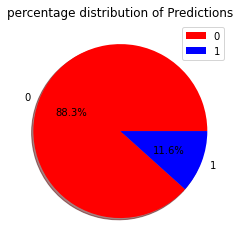

In [73]:
labels= unique
colors= ['r','b']
values=counts

plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.legend()
plt.title('percentage distribution of Predictions')

plt.show()

from the pie chart we can see that 87.6% people default the payment next month